In [13]:
from astropy.io import fits
import pandas as pd
import numpy as np
from astropy.table import Table
from bliss.catalog import convert_mag_to_nmgy

In [15]:
table = Table.read("/home/kapnadak/bliss/case_studies/galaxy_clustering/data_generation/redmapper_sva1-expanded_public_v6.3_members.fits")
df = table.to_pandas()
df

,ID,RA,DEC,R,P,P_FREE,THETA_I,THETA_R,MAG_AUTO_G,MAGERR_AUTO_G,MAG_AUTO_R,MAGERR_AUTO_R,MAG_AUTO_I,MAGERR_AUTO_I,MAG_AUTO_Z,MAGERR_AUTO_Z,Z_SPEC,COADD_OBJECTS_ID
0,1,104.759602,-55.903158,0.868126,0.783947,1.0,1.000000,1.000000,21.949570,0.021828,20.347677,0.005885,19.803492,0.009052,19.489954,0.010690,-1.0,2924102426
1,1,104.804707,-55.886614,1.203799,0.032133,1.0,1.000000,0.694302,21.080441,0.009810,19.955923,0.004091,19.536043,0.007742,19.330839,0.009808,-1.0,2924104213
2,1,104.779776,-55.885828,1.086250,0.855959,1.0,1.000000,0.997875,22.052946,0.020068,20.547306,0.005846,20.020580,0.009085,19.715313,0.010825,-1.0,2924104247
3,1,104.821770,-55.883279,1.312433,0.780496,1.0,1.000000,0.047996,21.168688,0.015462,19.707525,0.004792,19.179884,0.008525,18.859488,0.009843,-1.0,2924104740
4,1,104.811481,-55.872320,1.334219,0.622183,1.0,1.000000,0.017850,21.123981,0.021484,19.915541,0.008251,19.505432,0.015854,19.218428,0.018839,-1.0,2924105979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90674,9058,67.502392,-58.370693,0.328518,0.508214,1.0,0.999999,1.000000,25.143179,0.226469,23.788034,0.076743,22.617744,0.048809,22.279425,0.067014,-1.0,2945499429
90675,9058,67.512681,-58.370300,0.416753,0.050354,1.0,0.999373,1.000000,24.359793,0.133894,23.429205,0.066992,22.679384,0.062688,22.327967,0.084922,-1.0,2945499464
90676,9058,67.515461,-58.368211,0.461415,0.138046,1.0,1.000000,1.000000,24.519791,0.117520,23.343904,0.049114,22.529673,0.041396,22.140692,0.052552,-1.0,2945499645
90677,9058,67.504254,-58.360906,0.479286,0.072485,1.0,1.000000,1.000000,23.716101,0.067762,22.338913,0.022719,21.479088,0.019162,21.159414,0.025995,-1.0,2945503332


In [16]:
cluster_indices = pd.unique(df["ID"])
cluster_idx = np.random.choice(cluster_indices)
cluster_members = df[df["ID"] == cluster_idx]

In [17]:
mags = np.array(
            cluster_members[
                [
                    "MAG_AUTO_G",
                    "MAG_AUTO_R",
                    "MAG_AUTO_I",
                    "MAG_AUTO_Z",
                ]
            ]
        )

fluxes = 1000 * convert_mag_to_nmgy(mags)
fluxes

array([[  13.227005,  235.42352 ,  647.7819  , 1277.8021  ],
       [ 291.56552 , 1326.1602  , 4518.047   , 7098.2246  ],
       [ 273.2288  ,  669.20276 , 1203.9878  , 1897.0353  ],
       [  93.94452 ,  431.67206 , 1004.36975 , 1320.7709  ],
       [ 746.9832  , 1366.0673  , 3016.9736  , 4288.7607  ],
       [ 372.18823 , 1395.3987  , 3050.4907  , 4399.024   ],
       [ 172.72495 ,  402.50018 ,  714.2404  , 1305.0253  ],
       [ 216.4987  ,  930.7012  , 1961.7676  , 2643.4868  ],
       [ 103.85742 ,  617.0145  , 1867.5863  , 3156.0896  ],
       [ 205.51959 ,  598.9117  , 1076.2457  , 1429.5352  ],
       [  74.84609 ,  341.33273 , 1096.2764  , 2199.3923  ],
       [ 249.53888 , 1144.7877  , 2961.6985  , 4124.6123  ],
       [  46.51896 ,  247.26884 ,  881.33466 , 1467.2544  ],
       [ 103.59484 ,  707.9333  , 2353.8257  , 4176.3804  ],
       [ 141.20364 ,  586.47394 , 1825.5565  , 3096.2793  ],
       [ 377.78024 ,  834.6012  , 1701.3982  , 2669.4146  ],
       [ 261.071   ,  61

In [8]:
80 * (cluster_members["R"] / 0.7)

39011    82.160843
39012    76.705612
39013    44.925976
39014    53.543095
39015    88.485634
39016    85.989456
39017    65.161766
39018    55.936588
39019    56.598137
39020    46.153713
39021    42.952118
39022    22.054960
39023    25.697407
39024    12.897096
39025    31.552006
39026    23.993616
39027    17.164770
39028    26.071220
39029    31.192642
39030    16.680586
39031     9.433840
39032    45.559231
39033    24.271601
39034     4.762424
39035    12.645297
39036     8.105115
39037    56.375103
39038    23.623737
39039     9.986589
39040    23.574541
39041    22.832111
39042    30.492783
39043    36.910450
39044     0.000000
39045    70.237801
39046    92.799255
Name: R, dtype: float32

In [1]:
from case_studies.galaxy_clustering.data_generation.cluster_prior import  ClusterPrior

cluster_prior = ClusterPrior()
cluster_prior.sample_cluster()

/home/kapnadak/bliss/.venv/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator GaussianMixture from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


,RA,DEC,X,Y,MEM,FLUX_G,FLUX_R,FLUX_I,FLUX_Z,HLR,FRACDEV,G1,G2,Z,SOURCE_TYPE
0,50.678914,-40.175853,3007.039384,3353.104338,1.0,774.344666,3177.541504,5352.671387,7338.734863,0.955516,0,0.097946,0.233924,-1.0,1.0
1,50.677268,-40.177657,2977.397662,3320.638346,1.0,629.962769,2810.887207,4621.424316,6086.806641,0.982817,0,-0.061228,-0.219678,-1.0,1.0
2,50.677560,-40.176476,2982.661054,3341.889595,1.0,1635.795776,5523.886230,8186.813477,11193.940430,0.814714,0,0.007167,0.140244,-1.0,1.0
3,50.678941,-40.177916,3007.510444,3315.963591,1.0,2414.829590,7324.232422,10989.527344,14891.422852,0.781367,0,-0.083089,-0.009168,-1.0,1.0
4,50.680208,-40.176859,3030.315960,3334.993843,1.0,670.618530,3182.211670,5509.794922,7202.937012,0.892414,0,0.122380,0.044455,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,50.677958,-40.180020,2989.820205,3278.100394,1.0,5762.996582,28335.644531,48095.000000,64970.917969,0.809961,0,0.129786,-0.014466,-1.0,1.0
66,50.681984,-40.175499,3062.296513,3359.478392,1.0,4861.879395,15274.143555,23480.888672,31170.125000,0.617285,0,-0.261460,0.001515,-1.0,1.0
67,50.679464,-40.177141,3016.938359,3329.909170,1.0,10050.352539,32676.113281,50794.492188,68904.039062,0.962159,0,0.103032,-0.228344,-1.0,1.0
68,50.680636,-40.177722,3038.023240,3319.461200,1.0,1194.559937,5384.397461,9188.499023,12312.117188,0.745375,0,-0.038719,0.583109,-1.0,1.0


In [2]:
cluster_prior.sample_center()

array([[1981.32205064, 1412.01053321]])

In [25]:
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from astropy.io import fits
import os
from pathlib import Path
import random
import pandas as pd

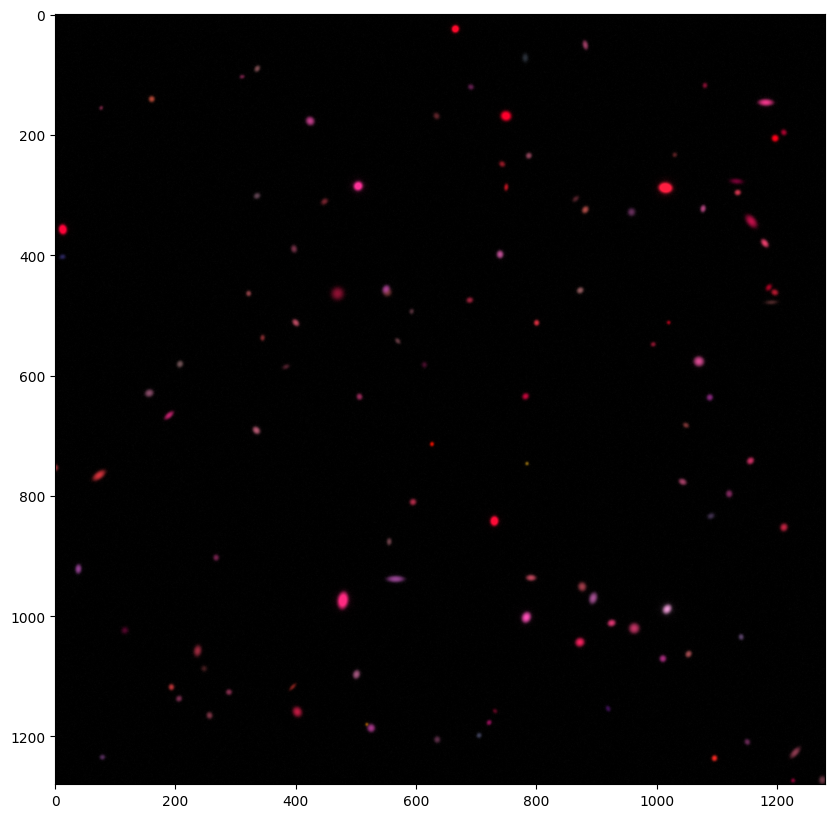

In [30]:
image_r = fits.getdata("/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_004_r.fits")
image_g = fits.getdata("/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_004_g.fits")
image_i = fits.getdata("/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_004_i.fits")
image_z = fits.getdata("/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_004_z.fits")

image_b = (image_i + image_z) / 2

rgb_default = make_lupton_rgb(image_b, image_r, image_g)
plt.figure(figsize=(10,10))
plt.imshow(rgb_default)